In [1]:
X = [1,2,3,4,5,6,7,8,9]

In [8]:
Y = [2,6,7,11,13,15,16,20,23]

In [9]:
# !pip install numpy pandas matplotlib scikit-learn seaborn jupyter

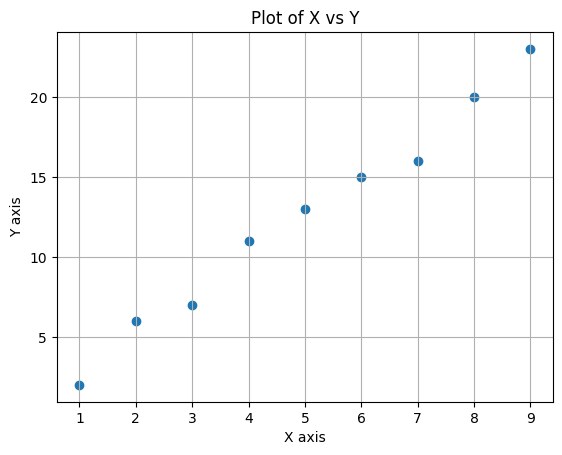

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Plot of X vs Y")
plt.grid()
plt.show()

In [11]:
mean_x = sum(X) / len(X)
mean_y = sum(Y) / len(Y)

In [14]:
print("The mean of X is:",mean_x,"\nThe mean of Y is:", mean_y)

The mean of X is: 5.0 
The mean of Y is: 12.555555555555555


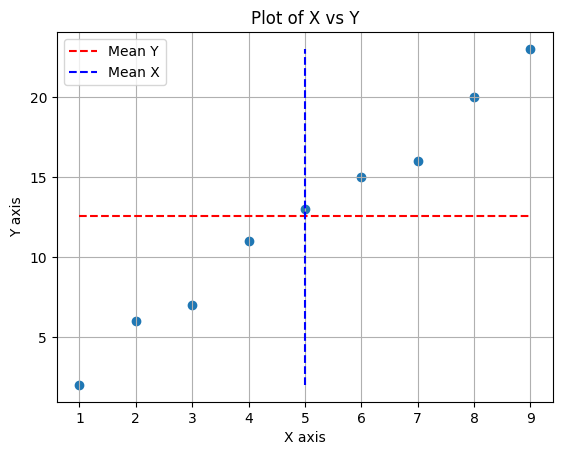

In [12]:
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [mean_y, mean_y], color='red', linestyle='--', label='Mean Y')
plt.plot([mean_x, mean_x], [min(Y), max(Y)], color='blue', linestyle='--', label='Mean X')
plt.legend()
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Plot of X vs Y")
plt.grid()
plt.show()

   X   Y  X^2  Y^2  X*Y
0  1   2    1    4    2
1  2   6    4   36   12
2  3   7    9   49   21
3  4  11   16  121   44
4  5  13   25  169   65
5  6  15   36  225   90
6  7  16   49  256  112
7  8  20   64  400  160
8  9  23   81  529  207


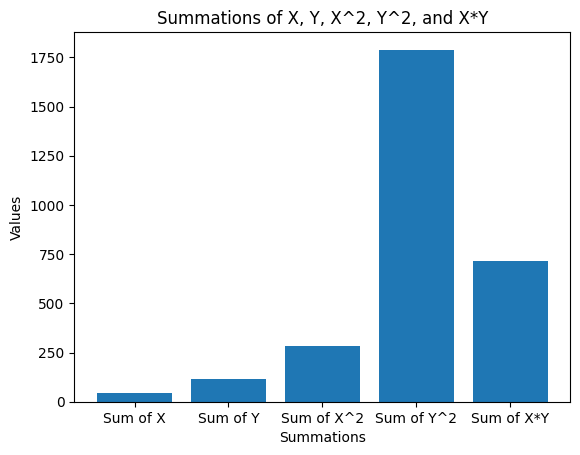

In [16]:
import numpy as np
import pandas as pd

# Calculate the required columns
X_squared = [x**2 for x in X]
Y_squared = [y**2 for y in Y]
X_times_Y = [x * y for x, y in zip(X, Y)]

# Create the table
data = {
    'X': X,
    'Y': Y,
    'X^2': X_squared,
    'Y^2': Y_squared,
    'X*Y': X_times_Y
}

df = pd.DataFrame(data)

# Display the table
print(df)

# Calculate the summations
sums = {
    'Sum of X': sum(X),
    'Sum of Y': sum(Y),
    'Sum of X^2': sum(X_squared),
    'Sum of Y^2': sum(Y_squared),
    'Sum of X*Y': sum(X_times_Y)
}

# Plot the summations
categories = list(sums.keys())
values = list(sums.values())

plt.bar(categories, values)
plt.xlabel("Summations")
plt.ylabel("Values")
plt.title("Summations of X, Y, X^2, Y^2, and X*Y")
plt.show()


### Formulas for Linear Regression

The equation of a straight line is:

\[
Y = mX + c
\]

Where:
- \( m \) is the **slope**
- \( c \) is the **intercept**

#### Slope \( m \):

\[
m = \frac{n\sum XY - \sum X \sum Y}{n\sum X^2 - (\sum X)^2}
\]

#### Intercept \( c \):

\[
c = \frac{\sum Y - m \sum X}{n}
\]


In [17]:
# Compute required sums
n = len(X)
sum_X = sum(X)
sum_Y = sum(Y)
sum_XY = sum(x*y for x, y in zip(X, Y))
sum_X_squared = sum(x**2 for x in X)

# Compute slope (m) and intercept (c)
m = (n * sum_XY - sum_X * sum_Y) / (n * sum_X_squared - sum_X**2)
c = (sum_Y - m * sum_X) / n

# Step 4: Print the results
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 2.466666666666667
Intercept (c): 0.2222222222222222


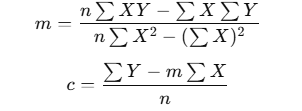

In [18]:
# Manually computing the slope (m) and intercept (c)

n = len(X)                       # n = 9
sum_X = sum(X)                   # 45
sum_Y = sum(Y)                   # 113
sum_XY = sum(x*y for x, y in zip(X, Y))        # 703
sum_X_squared = sum(x**2 for x in X)           # 285

# Now compute slope (m)
numerator = n * sum_XY - sum_X * sum_Y         # 9*703 - 45*113 = 6327 - 5085 = 1242
denominator = n * sum_X_squared - sum_X**2     # 9*285 - 45^2 = 2565 - 2025 = 540
m = numerator / denominator                    # 1242 / 540 = 2.3

# Intercept (c)
c = (sum_Y - m * sum_X) / n                    # (113 - 2.3*45)/9 = (113 - 103.5)/9 = 1.055...

print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")


Slope (m): 2.466666666666667
Intercept (c): 0.2222222222222222


In [19]:
np.polyfit(Y, X, 1)


array([ 0.3997599 , -0.01920768])

In [20]:
np.polyfit(X, Y, 1)


array([2.46666667, 0.22222222])